In [9]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import animation as am
from matplotlib import cm
from kuramoto import * # import the kuramoto classes from file 
import matplotlib.image as mpimg

## Next, we set up and run some 2D simulations 

In [10]:
# Set up model parameters 
epsilon = 1
eta = -1
sigma = 0.2
mean_omega = 0.4

# Set up simulation parameters 
Lx = 32
Ly = 32
T = 1e3
n_batches = T

# Initialise the model and run the simulation 
model = Kuramoto2D(epsilon, eta, sigma, mean_omega, BC='grad', grad=[0, 0])
model.initialise(Lx, Ly, T, n_batches, seed=1000)
# model.omegas[15, 15] += 0.4
model.omegas[0]=0 
model.omegas[-1]=0 
model.omegas[:, 0]=0
model.omegas[:, -1]=0
model.evolve() 

100%|██████████| 1000/1000 [00:03<00:00, 330.59it/s]


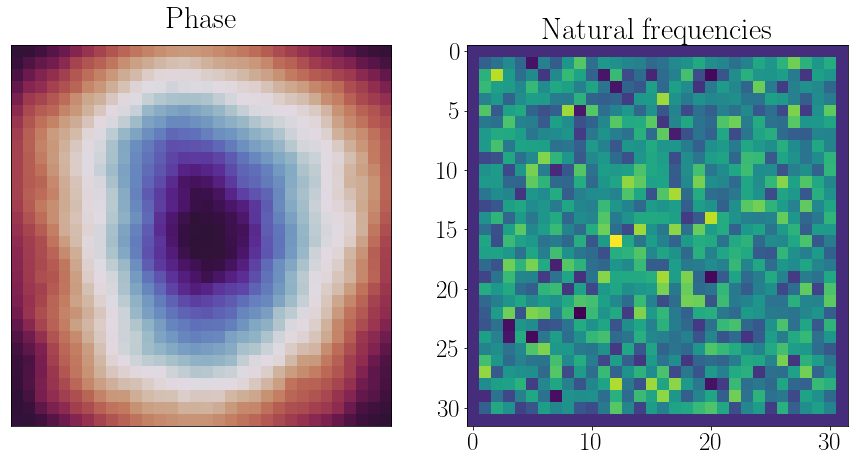

In [11]:
last_slice = model.res[-1].reshape((Lx, Ly))

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 25,
})

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

im = axes[0].imshow(last_slice.T % (2*np.pi), origin='lower', cmap='twilight', aspect='auto')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title(r'Phase', y=1.03)

axes[1].imshow(model.omegas)
axes[1].set_title(r'Natural frequencies')
plt.show() 

## Make movie of the 2D simulation 

In [12]:
# Reshape the result into 2D shape 
N = 100 # number of frames to use in making the movie 
phase_evolution = model.res.reshape((model.n_frames, model.Lx, model.Ly))
phase_evolution = phase_evolution[-N::]

# Set up figure plotting 
plt.rc('font', size=25)
fig = plt.figure(figsize=(13, 10))
low, high = 0, 2*np.pi 

# Plot the movie one snapshot at a time 
ims = []
im = plt.imshow(phase_evolution[0].T, vmin=low, vmax=high, animated=True, cmap='twilight')
plt.title(r'$\sigma={}, \epsilon ={}, \eta ={}$'.format(sigma, epsilon, eta))
plt.axis('off')
cbar = plt.colorbar(im, shrink=0.6)
cbar.set_ticks([0, 2*np.pi])
cbar.set_ticklabels([r'0', r'$2\pi$'])
plt.tight_layout()
for i in range(N):
    xy = phase_evolution[i].T % (2*np.pi)
    im = plt.imshow(xy, vmin=low, vmax=high, animated=True, cmap='twilight')
    plt.axis('off')
    ims.append([im])
ani = am.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)
mywriter = am.FFMpegWriter()
ani.save("movie_no_osci_bc_noise.mp4", writer=mywriter)
plt.close()


## Now you will find a .mp4 file in the same folder